# BASIC SENTIMENT ANALYSIS
This is the first notebook for NLP task and also in some sense the buildup and prerequisite for the end to end feedback ML project. 

**My goals in this notebook are -**
1. Learn basic data preparation and preprocessing for NLP tasks
2. Learn the basic modelling for NLP using conventional models
3. Learn different text methods
4. Evaluate the Model
5. Then move to transformers/RNN for this task

In [2]:
import numpy as np
import pandas as pd

In [3]:
def convert_dataframe(file_path, label):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            pos_lines = f.readlines()
            pos_lines = [line.strip() for line in pos_lines if line.strip()]
            df_pos = pd.DataFrame({"review":pos_lines, "label":label})
            return df_pos
    except Exception as e:
        print("some error ocurred")
        print(e)
        return None

In [4]:
data_pos = convert_dataframe("TrainingDataPositive.txt", 1)
data_neg = convert_dataframe("TrainingDataNegative.txt", 0)

In [5]:
data_pos.head()

,review,label
0,This paddle sport supply store is stocked to t...,1
1,This place is a veritable candy store for outd...,1
2,I've done quite a bit of canoeing and kayaking...,1
3,Great place to rent kayaks for a little bit of...,1
4,"Amazing selection of product, and very knowled...",1


In [6]:
data_neg.head()

,review,label
0,"Perhaps good product, but really poor service....",0
1,Been going here for specialty boat items for 1...,0
2,This place was a joke we rented 1 jet ski and ...,0
3,We were out at the lake this weekend boating a...,0
4,JET ACTION RENTALS destroyed my view on small ...,0


In [7]:
## Mixing these 2 datasets and shuffling them
data = pd.concat([data_pos, data_neg])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data.head(20)

,review,label
0,THANK YOU ROB! i truly appreciated all the hel...,1
1,Just walked in for a tapas sampler and a drink...,1
2,Our group of 15 needed a place for dinner afte...,1
3,"The sandwiches, the wings, enough said. Alexio...",1
4,It was the first time I've ever been here and ...,1
5,"I went to Pino's recently, only to be disappoi...",0
6,As an Ethiopian I found it lacking in authenti...,0
7,This is my first and probably only Yelp review...,1
8,It's been four years since I'd last reviewed t...,1
9,I treat Madison like a nice weekend retreat. T...,1


In [8]:
data["label"].value_counts()

label
1    7961
0    3249
Name: count, dtype: int64

**We have somewhat of an unbiased data**

## 1. DATA PREPROCESSING
Here we basically clean the text and convert it into useful form for feeding in the model.

**The Main Steps Are -**
1. Data cleaning
2. Tokenization
3. Stopword Removal
4. Stemming/Lemmatization

### 1.1 TEXT CLEANING
1. Converting to lowercase
2. Remove digits
3. Remove non words and non whitespaces

In [12]:
# 1. Converting to lowercase
def convert_to_lower(val):
    return val.lower()
data["review"] = data["review"].apply(lambda x : convert_to_lower(x))

In [13]:
# remove non letters and non whitespaces
def remove(val):
    str = ""
    for v in val:
        if v.isalpha() or v == ' ':
            str+=v
    return str
data["review"] = data["review"].apply(lambda x : remove(x))

### 1.2 TOKENIZE
We will use simple NLTK methods for now

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Aaroh
[nltk_data]     Shina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aaroh
[nltk_data]     Shina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from nltk.tokenize import word_tokenize

def tokenize(val):
    return word_tokenize(val)

data["review"] = data["review"].apply(tokenize)

### 1.3 STOPWORD REMOVAL
Stopwords are the words such as The/is/and etc. These words in a sense dont add much value to the meaning of sentence, especially for ML models. Do we remove the stopwords. We remove them as - 
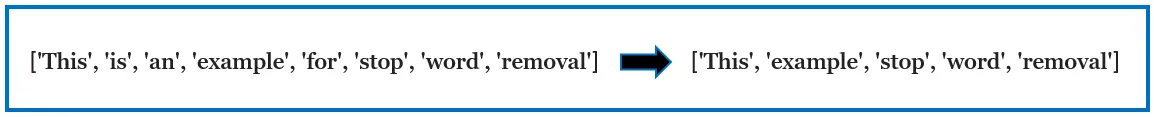

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
list(stop_words)[:5]

['but', 'or', 'then', 'aren', 'shouldn']

In [19]:
stop_words = list(stop_words)
def remove_stopwords(val):
    return [word for word in val if word not in stop_words]
data["review"] = data["review"].apply(remove_stopwords)
data.head()

,review,label
0,"[thank, rob, truly, appreciated, help, receive...",1
1,"[walked, tapas, sampler, drink, sampler, exqui...",1
2,"[group, needed, place, dinner, sisters, weddin...",1
3,"[sandwiches, wings, enough, said, alexions, be...",1
4,"[first, time, ive, ever, loved, meals, quite, ...",1


### 4. Stemming/Lemmatization

In [21]:
# 1. PORTER STEMMING
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(val):
    stemmed = [stemmer.stem(word) for word in val]
    return stemmed
data_porter_stemmed = data["review"].apply(stem_words)
data_stemmed = pd.DataFrame({"review":data_porter_stemmed, "label":data["label"]})
data_stemmed.head()

,review,label
0,"[thank, rob, truli, appreci, help, receiv, age...",1
1,"[walk, tapa, sampler, drink, sampler, exquisit...",1
2,"[group, need, place, dinner, sister, wed, two,...",1
3,"[sandwich, wing, enough, said, alexion, best, ...",1
4,"[first, time, ive, ever, love, meal, quit, app...",1


In [22]:
# 2. LEMMATIZATION
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ       
    elif treebank_tag.startswith('V'):
        return wordnet.VERB   
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN    
    elif treebank_tag.startswith('R'):
        return wordnet.ADV    
    else:
        return wordnet.NOUN 

def lemmatize_words(text):
    pos_tags = pos_tag(text)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

data_lemma = data["review"].apply(lemmatize_words)
data_lemmatized = pd.DataFrame({"review":data_lemma, "label":data["label"]})
data_lemmatized.head()

[nltk_data] Downloading package punkt to C:\Users\Aaroh
[nltk_data]     Shina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aaroh
[nltk_data]     Shina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aaroh Shina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,label
0,"[thank, rob, truly, appreciate, help, receive,...",1
1,"[walk, tapas, sampler, drink, sampler, exquisi...",1
2,"[group, need, place, dinner, sister, wed, two,...",1
3,"[sandwich, wing, enough, say, alexions, best, ...",1
4,"[first, time, ive, ever, love, meal, quite, ap...",1


## 2. CONVERTING DATA TO FEED IN MODEL
**BAG OF WORDS:** Bag of words is a technique in NLP which is used to convert the token of words into numerical form. It converts tokens to vector of frequencies of the words. It doesnt store each sentence in vectorized form in sequence. Its like an hashmap in a very layman sense.
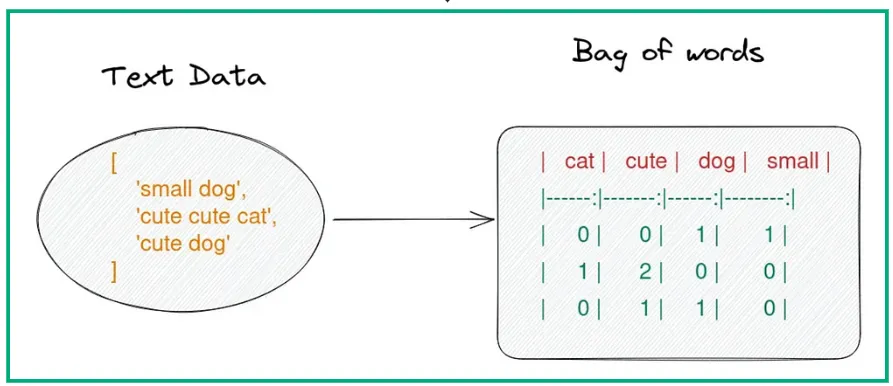

BoW is a way of converting text into numerical features so that a machine learning model can work with it. Here's what it does:
* It ignores word order, grammar, and sentence structure.
* It counts how often each word appears in the document.
* It uses a vocabulary (set of all unique words across the dataset).

**Example:**

If your vocabulary is ["good", "bad", "amazing", "terrible"], then the sentence:

"This movie was amazing but also a bit terrible."
becomes:
[0, 0, 1, 1] (1 "amazing", 1 "terrible", no "good" or "bad")

**The classifier (like logistic regression, naive Bayes, SVM, etc.) learns patterns in the frequency of specific words that tend to occur in positive or negative contexts.**

Example:
Let’s say you're training a sentiment classifier on movie reviews. Over time it might learn:
Words like "amazing", "good", "love" occur often in positive reviews.
Words like "boring", "hate", "bad" occur often in negative reviews.
Then, when it sees a new review, it looks at the word frequencies and makes a statistical guess about the sentiment based on what it has learned.

In [24]:
'''
STEPS TO MAKE BOW - 
1. We need to tokenize the sentence. (already done)
2. Then we need to create a vocabulary. Here we will just take all the unique words in the entire datasets as the vocab. 
No word is gonna be beyond that obviously.
3. Then we need to vectorize
'''

# 1. token form of words - 
data_stemmed["review"]

0        [thank, rob, truli, appreci, help, receiv, age...
1        [walk, tapa, sampler, drink, sampler, exquisit...
2        [group, need, place, dinner, sister, wed, two,...
3        [sandwich, wing, enough, said, alexion, best, ...
4        [first, time, ive, ever, love, meal, quit, app...
                               ...                        
11205    [love, indian, food, although, eat, everyday, ...
11206                            [awesom, bar, menu, town]
11207      [great, local, pizza, employe, alway, friendli]
11208    [come, yearsthrough, owner, alway, great, food...
11209    [would, like, person, thank, rene, pomatto, sh...
Name: review, Length: 11210, dtype: object

In [25]:
# 2. Making vocabulary -  Conventional way
vocab = set() # vocab needs to be a set so we can skip the repeating words
data_tokens = data_stemmed["review"].tolist()
for token_list in data_tokens:
    vocab.update(token_list)

list(vocab)[:5]
# Now we have the vocab complete

['simplenoth', 'hostesscoown', 'daywhich', 'yetso', 'stuf']

In [26]:
len(vocab)

32663

**The problem is we have 30000 words. Means each sample will be an frequency vector of size 30000. Now this is too inexpensive. So lets use The COUNTVECTORIZER. What it does is remove words with low weightage and reduces vocab to 10000 (or a number we want)**

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into full text strings
data_text = [' '.join(tokens) for tokens in data_stemmed["review"]]

# Fit on the full dataset (i.e., all reviews)
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data_text)  # This is your BoW matrix
X[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 3. EVALUATING THE BASIC MODEL
Now we have the independent variables, the reviews in numeric format. And the labels in df. We can feed it into models. 
**Let's use basic models**

### 3.1 MULTINOMIAL NAIVE BAYES MODEL
Multinomial Naive Bayes is a extension of the NAIVE BAYES model. It is used for text classification and a good baseline model or a starting point. It models the frequency of the word and assumes each word is multinomially distributed.

It counts frequencies of words in the class. And if in the test sample that word appears, it maps the sample to predict that class.
For example if word "discount" appears a lot in SPAM than HAM. It would predict the test samples having "discount" as SPAM.

**This was the layman definition. Its not this simple tbh. But works in this intution only**

Lete's first implement and then move forward with the theory

In [30]:
data_stemmed["label"].value_counts()

label
1    7961
0    3249
Name: count, dtype: int64

In [31]:
# Downsampling the data (there is slight imbalance. Our model0 performs badly. So we are trying to fix it)from sklearn.utils import resample
from sklearn.utils import resample
import pandas as pd

# Assuming df has 'text' and 'label' columns

# Separate classes
df_pos = data_stemmed[data_stemmed['label'] == 1]
df_neg = data_stemmed[data_stemmed['label'] == 0]

# Downsample positive class
df_pos_downsampled = resample(
    df_pos,
    replace=False,
    n_samples=len(df_neg),
    random_state=42
)

# Combine balanced data
df_balanced = pd.concat([df_pos_downsampled, df_neg])

# Shuffle rows
df_balanced = df_balanced.sample(frac=1, random_state=42)
data_stemmed = df_balanced
data_stemmed

,review,label
8133,"[went, tapa, saturday, night, food, aw, chees,...",0
8773,"[come, chatti, famili, said, sister, alway, me...",1
9035,"[fan, first, visit, second, overal, valley, im...",0
7289,"[new, owner, someth, right, high, school, ever...",1
8549,"[grotesqu, food, vulgar, staff, blech]",0
...,...,...
1828,"[known, first, fail, attempt, compani, wouldnt...",0
6815,"[order, roast, pork, menehun, look, like, tv, ...",0
6913,"[aw, servic, overpr, food, dont, wast, money, ...",0
7525,"[crave, use, goto, lunch, spot, chines, food, ...",0


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into full text strings
data_text = [' '.join(tokens) for tokens in data_stemmed["review"]]

# Fit on the full dataset (i.e., all reviews)
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data_text)  # This is your BoW matrix
X[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = X
y = data_stemmed["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.2)

In [34]:
# the model 0
model0 = MultinomialNB()
model0.fit(X_train, y_train)

MultinomialNB()

In [35]:
# Making predictions to evaluate the accuracy
y_preds = model0.predict(X_test)
y_preds

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy  = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall    = recall_score(y_test, y_preds)
f1        = f1_score(y_test, y_preds)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_preds))

Accuracy:  0.9354
Precision: 0.9307
Recall:    0.9446
F1 Score:  0.9376

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       632
           1       0.93      0.94      0.94       668

    accuracy                           0.94      1300
   macro avg       0.94      0.94      0.94      1300
weighted avg       0.94      0.94      0.94      1300



**ACCURACY -** How many predictions are correct

**PRECISION -** Of all predicted positives, how many of them are correct

**RECALL -** Of all actual positives how many did we catch

**F1 SCORE -** Harmonic Mean of precision and recall

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))


[[585  47]
 [ 37 631]]


In [39]:
X[0].toarray().shape

(1, 10000)

In [40]:
len(vocab) # Create word → index mapping
vocab_dict = {word: idx for idx, word in enumerate(vectorizer.get_feature_names_out())}

def get_freq(sentence_tokens):
    vec = np.zeros(10000)
    for word in sentence_tokens:
        if word in vocab_dict:
            vec[vocab_dict[word]] += 1
    return vec

get_freq("Hello world")

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
data_text[0]

'went tapa saturday night food aw chees meat plate preprepar old cold hadto chisel meat fork chees stain sausag slice rest know long rest got better expens scallop lamb tastless calmari soft still stringi membran attach yuck never go back'

In [42]:
X[0].shape

(1, 10000)

In [43]:
import re
sentence = "The homepage looks incredible. I just love the UI of the workspace. Great work overall!"
def preprocess(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # Remove non-letters
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra whitespace
    return text
cleaned = preprocess(sentence)
X_test = get_freq(sentence)
X_test = X_test.reshape((1, 10000))
X_test.shape

(1, 10000)

In [44]:
import re

sample_sentences = [
    "Really impressed with the latest update! The UI feels smoother and the task management is now super intuitive.",
    "Honestly, the app keeps crashing every time I try to upload a note. It's getting unusable now.",
    "The idea is great, and some parts are well implemented, but performance issues really ruin the experience.",
    "I love how minimal and focused the workspace is. It helps me stay productive without distractions!",
    "I lost all my saved tasks after the update. No warning, no backup — just gone.",
    "Design is neat and it's functional, but the loading time makes it feel sluggish on my phone.",
    "Customer support was super responsive. They resolved my issue within an hour. Kudos!",
    "The dashboard analytics don't work. Every time I click 'View more', the chart just disappears.",
    "This app really helps me organize my day. Reminders, notes, and tasks all in one place!",
    "Notifications are helpful, but sometimes too aggressive. A setting to control them would be nice."
]



# Preprocessing
def preprocess(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # Remove non-letters
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra whitespace
    return text

# Use already fitted vectorizer and trained model
def fit_samples(sample_sentences, clf, vectorizer):
    for sentence in sample_sentences:
        cleaned = preprocess(sentence)
        X_test = vectorizer.transform([cleaned])
        pred = clf.predict(X_test)
        proba = clf.predict_proba(X_test)
        print(f"{sentence}\n→ Predicted: {'Positive' if pred[0] == 1 else 'Negative'} "
              f"({round(proba[0][pred[0]] * 100, 2)}% confidence)\n")


# Call it
fit_samples(sample_sentences, model0, vectorizer)

Really impressed with the latest update! The UI feels smoother and the task management is now super intuitive.
→ Predicted: Positive (93.41% confidence)

Honestly, the app keeps crashing every time I try to upload a note. It's getting unusable now.
→ Predicted: Negative (61.66% confidence)

The idea is great, and some parts are well implemented, but performance issues really ruin the experience.
→ Predicted: Negative (58.78% confidence)

I love how minimal and focused the workspace is. It helps me stay productive without distractions!
→ Predicted: Positive (86.51% confidence)

I lost all my saved tasks after the update. No warning, no backup — just gone.
→ Predicted: Negative (93.1% confidence)

Design is neat and it's functional, but the loading time makes it feel sluggish on my phone.
→ Predicted: Positive (71.66% confidence)

Customer support was super responsive. They resolved my issue within an hour. Kudos!
→ Predicted: Positive (50.37% confidence)

The dashboard analytics don't w

In [45]:
data[data["label"] == 0].review.iloc[0]

['went',
 'pinos',
 'recently',
 'disappointed',
 'owner',
 'guess',
 'read',
 'reviews',
 'going',
 'seeing',
 'lot',
 'people',
 'echo',
 'sentiments',
 'feelafter',
 'mother',
 'sent',
 'back',
 'extremely',
 'oversalted',
 'steak',
 'chef',
 'came',
 'apologize',
 'embarrassing',
 'chastised',
 'enjoying',
 'meal',
 'snidely',
 'commented',
 'walking',
 'away',
 'would',
 'never',
 'salt',
 'steak',
 'dont',
 'really',
 'take',
 'kindly',
 'people',
 'speaking',
 'rudely',
 'mother',
 'polite',
 'sending',
 'back',
 'certainly',
 'didnt',
 'deserve',
 'attitude',
 'event',
 'attend',
 'clear',
 'waitress',
 'mother',
 'reordered',
 'another',
 'meal',
 'salad',
 'took',
 'another',
 'twenty',
 'minutes',
 'mom',
 'asked',
 'immediately',
 'wrapped',
 'chef',
 'returned',
 'obviously',
 'chewing',
 'make',
 'point',
 'sneered',
 'mother',
 'announcing',
 'steak',
 'refused',
 'eat',
 'actually',
 'quiet',
 'good',
 'well',
 'never',
 'felt',
 'embarrassed',
 'situation',
 'said',
 '

### 3.2 Multinomial Naive Bayes model with TF-IDF
Bag of words plainly converted the text into the raw counts of token frequencies. That is doomed to give wrong outputs on certain cases.
**Tf-Idf** on the other hand converts the text to a weighted representation.

**Unlike simple word frequency, TF-IDF balances common and rare words to highlight the most meaningful terms.**

#### FORMULA AND WORKING - 
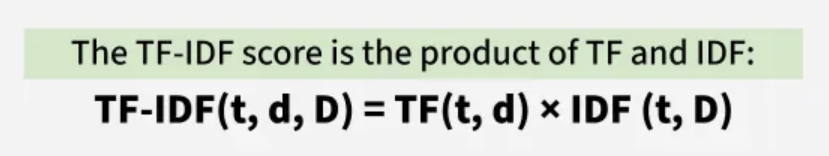

**TF - Term Frequency** - It suggests how often the word appears in the sentence. A higher frequency might suggest greater importance and the word must be important to the meaning of sentence. Its formula is (freq of that word)/(total number of words). But it can not be used independently because it might also highlight neaningless words. eg - 'the' might appear lot of times. But it doesnt add any meaning. Hence we use it with Idf.

**IDF - Inverse Document Frequency** - It suggests how rare the word is in the sentence. Rare word means it might be important. For eg - "The site is a good site. The site has lots of good things. Its marvellous". Marvellous is a rare word. We combine IDF with TF to get best importance score for the words in sentence and vectorize the sentence. Its formula is log((total sentences in corpus)/(sentence containing the rare word)).

* In short TF-IDF helps find words with no importance and words with good importance.
* Tf-Idf handles imbalance better
* Better combination with naive bayes

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_text = [' '.join(tokens) for tokens in data_stemmed["review"]]
tf_vectorizer = TfidfVectorizer(max_features=20000)
X_tf_idf = tf_vectorizer.fit_transform(data_text)
X_tf_idf

<6498x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 341784 stored elements in Compressed Sparse Row format>

In [48]:
X = X_tf_idf
y = data_stemmed["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.2)

In [49]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
}

grid = GridSearchCV(MultinomialNB(), params, scoring='f1', cv=5)
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("Best score:", grid.best_score_)


Best alpha: {'alpha': 0.5}
Best score: 0.9254851772960198


In [50]:
model1 = MultinomialNB(alpha=0.5)
model1.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [51]:
y_preds1 = model1.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy  = accuracy_score(y_test, y_preds1)
precision = precision_score(y_test, y_preds1)
recall    = recall_score(y_test, y_preds1)
f1        = f1_score(y_test, y_preds1)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_preds1))

Accuracy:  0.9323
Precision: 0.9560
Recall:    0.9102
F1 Score:  0.9325

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       632
           1       0.96      0.91      0.93       668

    accuracy                           0.93      1300
   macro avg       0.93      0.93      0.93      1300
weighted avg       0.93      0.93      0.93      1300



For the model, most metrics are good.

In [62]:
import re
sample_sentences = [
    "Really impressed with the latest update! The UI feels smoother and the task management is now super intuitive.",
    "Honestly, the app keeps crashing every time I try to upload a note. It's getting unusable now.",
    "The idea is great, and some parts are well implemented, but performance issues really ruin the experience.",
    "I love how minimal and focused the workspace is. It helps me stay productive without distractions!",
    "I lost all my saved tasks after the update. No warning, no backup — just gone.",
    "Design is neat and it's functional, but the loading time makes it feel sluggish on my phone.",
    "Customer support was super responsive. They resolved my issue within an hour. Kudos!",
    "The dashboard analytics don't work. Every time I click 'View more', the chart just disappears.",
    "This app really helps me organize my day. Reminders, notes, and tasks all in one place!",
    "Notifications are helpful, but sometimes too aggressive. A setting to control them would be nice."
]


# Preprocessing
def preprocess(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # Remove non-letters
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra whitespace
    return text

# Use already fitted vectorizer and trained model
def fit_samples(sample_sentences, clf, vectorizer):
    for sentence in sample_sentences:
        cleaned = preprocess(sentence)
        X_test = vectorizer.transform([cleaned])
        pred = clf.predict(X_test)
        proba = clf.predict_proba(X_test)
        print(f"{sentence}\n→ Predicted: {'Positive' if pred[0] == 1 else 'Negative'} "
              f"({round(proba[0][pred[0]] * 100, 2)}% confidence)\n")


# Call it
fit_samples(sample_sentences, model1, tf_vectorizer)

Really impressed with the latest update! The UI feels smoother and the task management is now super intuitive.
→ Predicted: Positive (61.32% confidence)

Honestly, the app keeps crashing every time I try to upload a note. It's getting unusable now.
→ Predicted: Negative (63.19% confidence)

The idea is great, and some parts are well implemented, but performance issues really ruin the experience.
→ Predicted: Negative (62.71% confidence)

I love how minimal and focused the workspace is. It helps me stay productive without distractions!
→ Predicted: Positive (57.47% confidence)

I lost all my saved tasks after the update. No warning, no backup — just gone.
→ Predicted: Negative (80.63% confidence)

Design is neat and it's functional, but the loading time makes it feel sluggish on my phone.
→ Predicted: Negative (50.14% confidence)

Customer support was super responsive. They resolved my issue within an hour. Kudos!
→ Predicted: Negative (53.93% confidence)

The dashboard analytics don't 

## PROBLEM WITH NAIVE BAYES (WHERE IT HITS THE WALL)
The main problem with Naive Bayes is that it sees frequencies, ignores the grammer,negation,meaning and context.
For eg our model might have mapped the term dashboard and responsive in positive class. But a review "The dashboard UI is not good and the responsiveness must be better. it lags" is a negative one but due to mapping might come out as positive.

### 3.3 Other classification models
Now we use other classification models such as 
* Logistic Regression
* SVM Classifier
* XGBoost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

sample_sentences = [
    "Really impressed with the latest update! The UI feels smoother and the task management is now super intuitive.",
    "Honestly, the app keeps crashing every time I try to upload a note. It's getting unusable now.",
    "The idea is great, and some parts are well implemented, but performance issues really ruin the experience.",
    "I love how minimal and focused the workspace is. It helps me stay productive without distractions!",
    "I lost all my saved tasks after the update. No warning, no backup — just gone.",
    "Design is neat and it's functional, but the loading time makes it feel sluggish on my phone.",
    "Customer support was super responsive. They resolved my issue within an hour. Kudos!",
    "The dashboard analytics don't work. Every time I click 'View more', the chart just disappears.",
    "This app really helps me organize my day. Reminders, notes, and tasks all in one place!",
    "Notifications are helpful, but sometimes too aggressive. A setting to control them would be nice."
]

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

def get_metrics(y_test, y_preds1):
    accuracy  = accuracy_score(y_test, y_preds1)
    precision = precision_score(y_test, y_preds1)
    recall    = recall_score(y_test, y_preds1)
    f1        = f1_score(y_test, y_preds1)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

for keys in models.keys():
    print(f"{keys} - \n")
    model = models[keys]
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    get_metrics(y_test, y_preds)
    print(" ")
    fit_samples(sample_sentences, model, tf_vectorizer)

✅ Best Overall:
→ SVM — highest scores and more decisive predictions.

✅ Reliable Alternative:
→ Logistic Regression — fast, stable, nearly as good.

✅ Underperformer:
→ Gradient Boosting — lower metrics, seems too biased toward Negative.

### 3.4 WORD EMBEDDINGS
#### WORD2VEC
Word2Vec is a powerful word embedding technique used in text/NLP problems. Unlike conventional bag or words / TF-idf which maps the tokens based on some algorithm ignoring the context/semantic meaning of the sentence, Word embedding methods like word2vec focuses on mapping into vectors in a way semantic relations, meanings and context are preserved.
**Word2Vec is of 2 types - SkipGrams and CBOW**
##### **1. SKIP GRAMS**
##### **1. SKIP GRAMS**

* Its main aim is to vectorize the sentence and also preserve the semantic meaning. Suppose we have a sentence, *"The dashboard is pretty bad"*. What it does is it forms different pairs as - (the, dashboard), (dashboard, pretty), (is, pretty), (the, pretty), (dashboard, bad), (the, bad), (pretty, bad)....and so on.
* Then we train a simple single layered neural network model that outputs the probability distribution that represents some information. What does this mean? Suppose we get a vector embedding as - [0.22, 0.91, 0.45,........] with n dimensions. Each dimension might mean some statistical information. Dimension 1 may be "Correlation with negative words", dimension 20 may be "Goodness of dashboard" and so on. This is not explicit; this is done in an abstracted manner.
* In two tokens, we can calculate the cosine similarity, which basically means how close they statistically are. If they are closer, it means their semantic relation is similar (though not equal).
* `cat → [0.2, -0.3, 1.4]` `dog → [0.18, -0.32, 1.39]` `car → [-1.5, 2.7, -0.9]`. Then: cat and dog → close (cosine similarity ≈ 1) | cat and car → far apart. Because cat and dog occur in similar contexts like: “the ___ is furry” / “I feed my ___”. But “car” has different contexts enti

  **Its basically finding the co-occurance and co-context netween tokens**r
**Training -**
* Input: one-hot vector of the center word.
* Hidden layer: learns the embeddings (the magic part!).
* Output: probability distribution over all vocabulary words → predicting which words are context.
* Over time, similar words get similar embeddings because they share context words.ely.
texts entirely.

In [116]:
data_stemmed.head()

,review,label
8133,"[went, tapa, saturday, night, food, aw, chees,...",0
8773,"[come, chatti, famili, said, sister, alway, me...",1
9035,"[fan, first, visit, second, overal, valley, im...",0
7289,"[new, owner, someth, right, high, school, ever...",1
8549,"[grotesqu, food, vulgar, staff, blech]",0



**PARAMETERS -**
* sentences - what tokenized sentences we need to convert
* vector_size - what size would the embeddings vector be?
Note that for tf-idf we used 10000. But here we need not use so much size. This is because the
skip gram stores the semantic relations not frequencies or other metrics. The semantic relations 
are stored in a dense feature vector.
If the size of vector_size is too much, the model might overfit as it would try to learn too many
semantic relations. Even the unwanted and non-existent ones!
Hence for small datasets - 50-100, mid datasets - 100-300, large datasets - 300+
* window - The maximum distance between the current word and the context words.
For a word like "cat" in "the cat sat on the mat":
With window=2, context includes 2 words to the left and right → ["the", "sat"]
Larger windows → more global meaning
Smaller windows → more local/syntactic patterns
* sg = 1 for skip gram and 0 for cbow
* min_count = ignore words that appears fewer than min_count times. min_count = 1 suggests that model
takes each and every, even the rare words in considerations

**OPTIONAL -**
* epochs=10 → how many times to train over the dataset (default: 5)
* workers=4 → number of CPU cores used during training
* negative=5 → negative sampling size (for Skip-Gram optimization)
* seed=42 → for reproducibility


In [144]:
import scipy
print(scipy.__version__)

1.13.1


In [142]:
!conda install scipy==1.12 -y

Unable to create process using 'C:\Users\Aaroh Shina\anaconda3\python.exe "C:\Users\Aaroh Shina\anaconda3\Scripts\conda-script.py" install scipy==1.12 -y'


In [146]:
from gensim.models import Word2Vec
import numpy
import scipy
scipy.linalg.triu = numpy.triu
sentences = data_stemmed["review"]

w2v_model = Word2Vec(sentences, vector_size=150, window=5, sg=1, min_count=2)
# Now we have trained the embeddings above
# Now we need to convert the documents to dense vectors using the trained model

def document_vector(doc, model):
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

TypeError: 'NoneType' object is not subscriptable